In [3]:
import pandas as pd
import requests
import lxml.html as lh
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
url='https://people.dbmi.columbia.edu/~friedma/Projects/DiseaseSymptomKB/index.html'
page = requests.get(url)
doc = lh.fromstring(page.content)
tr_elements = doc.xpath('//tr')

In [5]:
tr_elements = doc.xpath('//tr')
 
col=[]
i=0
for t in tr_elements[0]:
    i+=1
    name=str(t.text_content()).strip('\n').replace('\n','').replace(' ','')
    print('%d:"%s"'%(i,name))
    col.append((name,[]))

1:"Disease"
2:"CountofDiseaseOccurrence"
3:"Symptom"


In [6]:
len(tr_elements)

1867

In [7]:
def prewc(word):
    for i in range(len(word)):
        try:
            int(word)
            return word
        except:
            if word[i]=='_':
                return word[i+1:]
def preoc(i:int):
    word = str(tr_elements[int(i)].text_content().replace('\n  \n  \n  ',',').replace('\n  \n  ','').replace('\n  ','').replace('\n ',''))
    words =[prewc(w)  for w in  word.split(',') ]
    return words

In [8]:
doc={}
a=0
for j in range(1,len(tr_elements)):
    ans = preoc(j)
    #print(ans)
 
    if ans[0]!=None:
        a+=1
        box=[]
        box.append(ans[2])
        doc[str(a)]={'disease':ans[0],
                    'occurence':ans[1],
                    'symptoms':box}
    else:
        box.append(ans[2])

disease=[]
occurrence=[]
symptoms=[]
symptomsno=[]
for c in doc.values():
    sym=''
    for x in c['symptoms']:
        sym+=','+str(x)
    disease.append(c['disease'])
    symptomsno.append(len(c['symptoms']))
    occurrence.append(int(c['occurence']))
    symptoms.append(sym.strip(','))

In [9]:
df=pd.DataFrame(columns=['Disease', 'Occurrence', 'Symptoms','Symptoms No'])

df['Disease']=disease
df['Occurrence']=occurrence
df['Symptoms']=symptoms
df['Symptoms No']=symptomsno

In [10]:
len(df)

134

In [11]:
df.isna().sum()

Disease        0
Occurrence     0
Symptoms       0
Symptoms No    0
dtype: int64

In [12]:
df

,Disease,Occurrence,Symptoms,Symptoms No
0,hypertensivedisease,3363,"painchest,shortnessof breath,dizziness,astheni...",12
1,diabetes,1421,"polyuria,polydypsia,shortnessof breath,painche...",14
2,depressionmental^UMLS:C0011581_depressive diso...,1337,"feelingsuicidal,suicidal,hallucinationsauditor...",21
3,coronaryarteriosclerosis^UMLS:C0010068_coronar...,1284,"painchest,anginapectoris,shortnessof breath,hy...",9
4,pneumonia,1029,"cough,fever,decreasedtranslucency,shortnessof ...",19
...,...,...,...,...
129,ileus,56,"abscess bacterial,abdomen acute,air fluid leve...",15
130,adhesion,57,"flatulence,pain,large-for-dates fetus,para 1,v...",13
131,delusion,56,"loose associations,giddy mood,feeling hopeless...",21
132,affectlabile,45,"extreme exhaustion,sleeplessness,enuresis,pati...",8


In [44]:
import numpy as np
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup

# Define the URL of the website
url = "https://people.dbmi.columbia.edu/~friedma/Projects/DiseaseSymptomKB/index.html"

# Send an HTTP GET request to the website
response = requests.get(url)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Parse the HTML content of the page
    soup = BeautifulSoup(response.text, 'html.parser')
    
    # Extract the disease names and occurrences from the website
    disease_elements = soup.find_all('td', class_='r')
    disease_names = [element.get_text() for element in disease_elements]
    
    occurrence_elements = soup.find_all('td', class_='n')
    occurrence_values = [int(element.get_text()) for element in occurrence_elements]
    
   

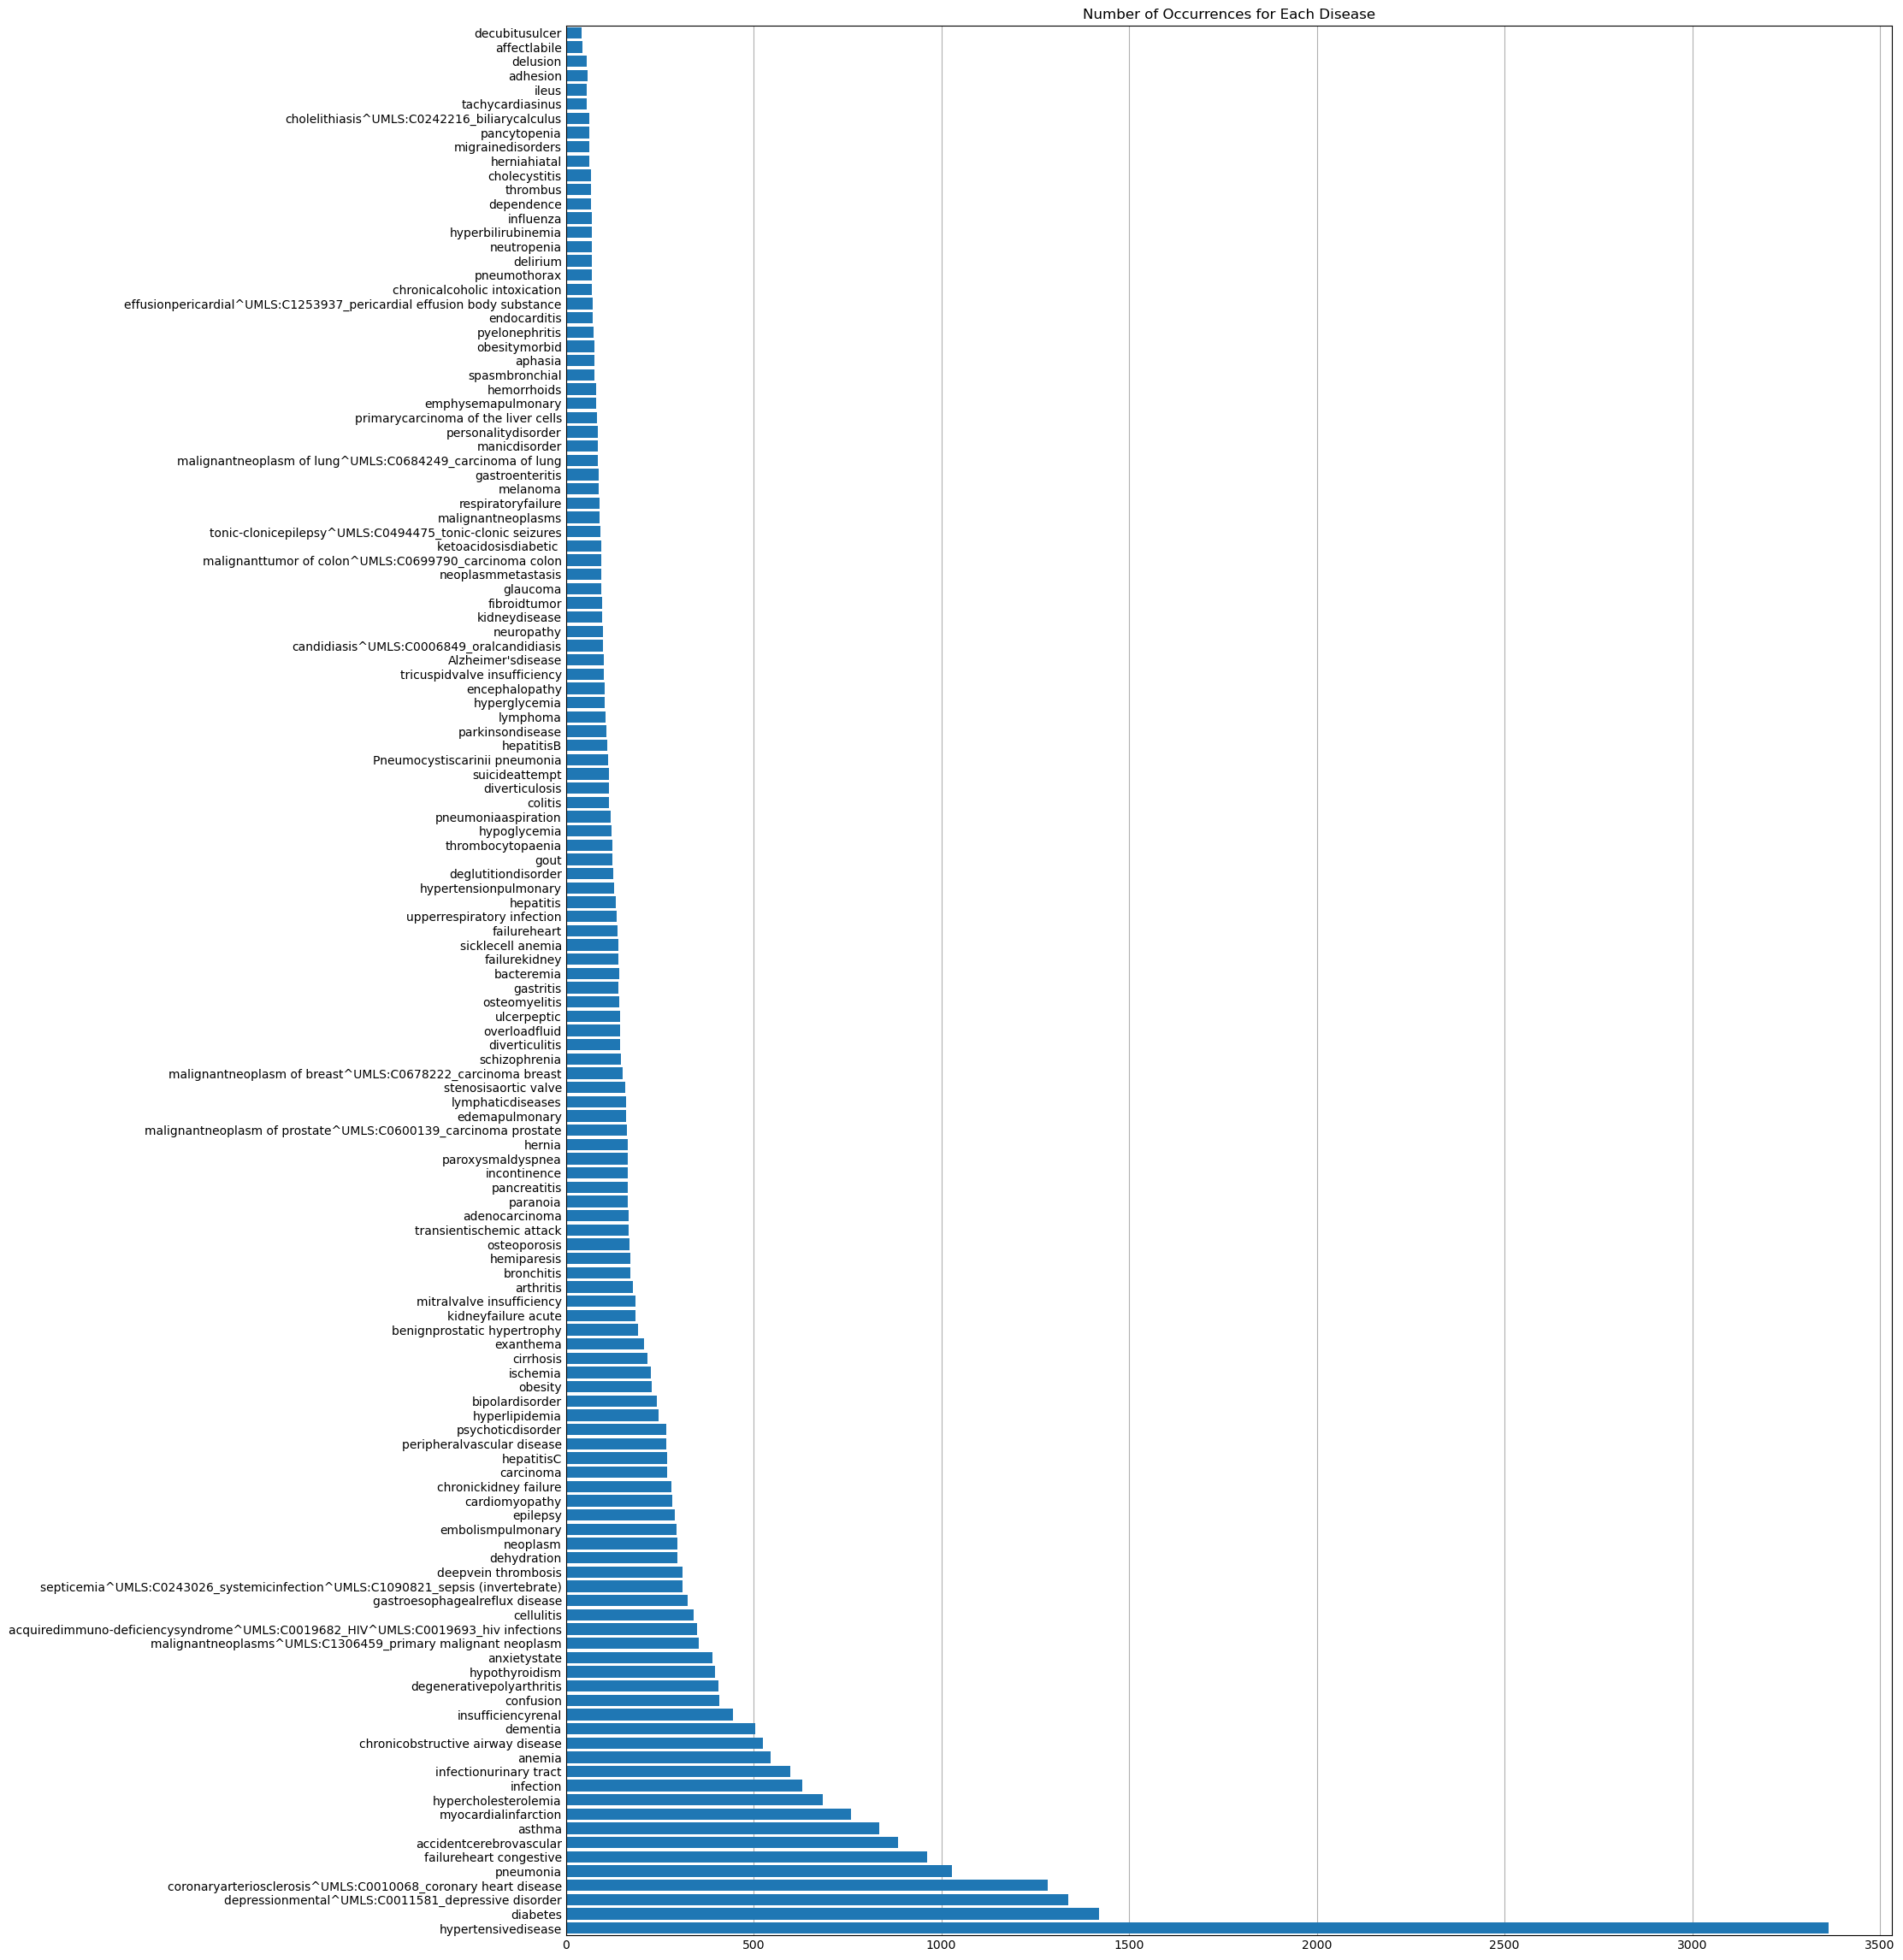

In [50]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Read data from the Excel file
data = pd.read_csv("C:\\Users\\supri\\data_src.csv")  

# Extract disease names and occurrences
disease_names = data['Disease'].tolist()
occurrence_values = data['Occurrence'].tolist()

def plotinfo(array, title):
    data = np.array(array)
    idx = np.arange(len(array))
    plt.rcParams["figure.figsize"] = (20, 29)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_ylim(-0.5, len(array) - 0.5)

    ax.tick_params(length=0)
    ax.barh(idx, data, zorder=2, tick_label=disease_names)
    ax.grid(axis='x')
    plt.title(title)
    plt.show()


plotinfo(occurrence_values, 'Number of Occurrences for Each Disease')


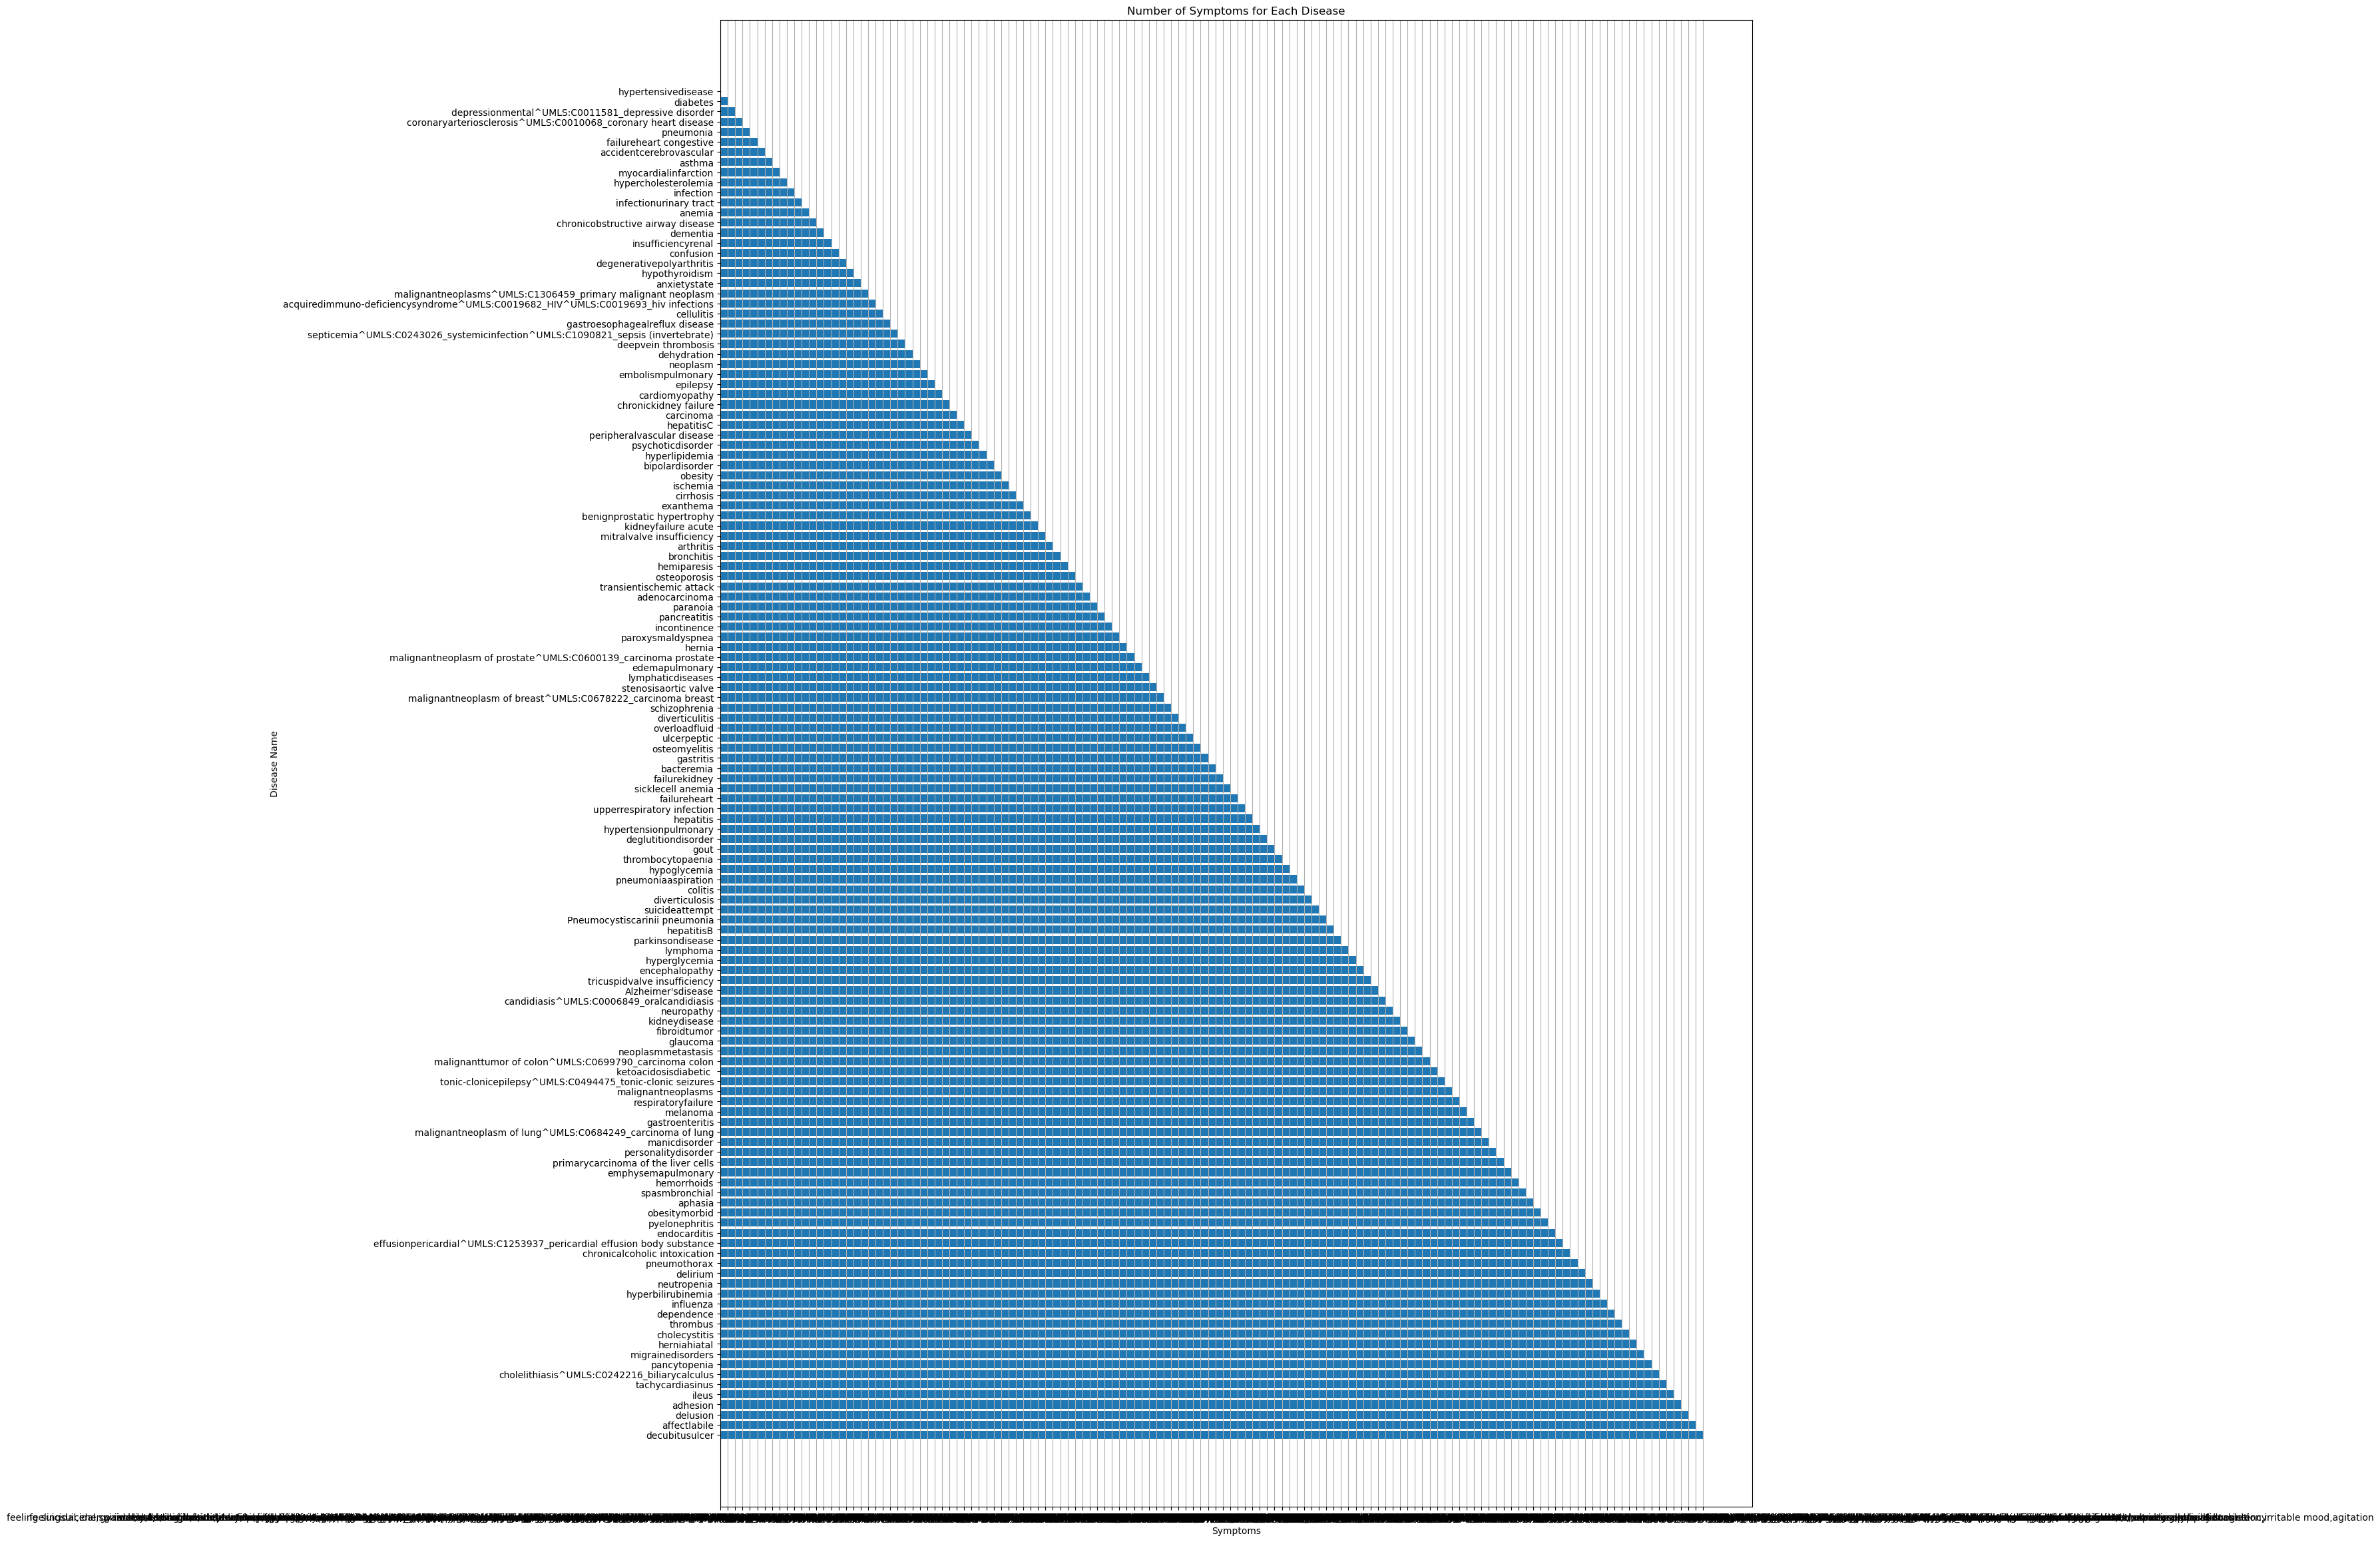

In [55]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Read data from the CSV file
data = pd.read_csv("C:\\Users\\supri\\data_src.csv")  # Adjust the file path as needed

# Extract disease names and symptoms values
disease_names = data['Disease']
symptoms_values = data['Symptoms']  

def plotinfo(names, values, title):
    plt.figure(figsize=(20, 29))
    idx = np.arange(len(names))
    plt.barh(idx, values, tick_label=names)
    plt.xlabel('Symptoms')
    plt.ylabel('Disease Name')
    plt.title(title)
    plt.gca().invert_yaxis()  
    plt.grid(axis='x')
    plt.show()


plotinfo(disease_names, symptoms_values, 'Number of Symptoms for Each Disease')



In [33]:
def unique(list1):
  
   
    unique_list = []
      
    # traverse for all elements
    for x in list1:
   
        if x not in unique_list:
            unique_list.append(x)
 
    return unique_list
      
ccc =[a for a in df['Symptoms']]
print('Total Number of Symptoms stated - {val}'.format(val=len(unique(','.join(ccc).split(',')))))

Total Number of Symptoms stated - 443


In [34]:
print('Total Number of Unique Symptoms stated - {val}'.format(val=len(','.join(ccc).split(','))))

Total Number of Unique Symptoms stated - 1866


In [35]:
df.to_csv('data_src.csv') # Extract data